In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jpcoeresearchece","key":"c5f9735b6549b240905a6c3a9b9c227d"}'}

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 72 Mar 26 10:07 kaggle.json


In [3]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [4]:
 # The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              221KB  2021-03-26 07:27:32            993  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44            777  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            702  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19            299  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [6]:
!kaggle datasets download -d gpiosenka/100-bird-species

 99% 1.59G/1.62G [00:24<00:00, 45.5MB/s]
100% 1.62G/1.62G [00:24<00:00, 71.4MB/s]


In [7]:
!unzip 100-bird-species.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/TOUCHAN/003.jpg   
  inflating: train/TOUCHAN/004.jpg   
  inflating: train/TOUCHAN/005.jpg   
  inflating: train/TOUCHAN/006.jpg   
  inflating: train/TOUCHAN/007.jpg   
  inflating: train/TOUCHAN/008.jpg   
  inflating: train/TOUCHAN/009.jpg   
  inflating: train/TOUCHAN/010.jpg   
  inflating: train/TOUCHAN/011.jpg   
  inflating: train/TOUCHAN/012.jpg   
  inflating: train/TOUCHAN/013.jpg   
  inflating: train/TOUCHAN/014.jpg   
  inflating: train/TOUCHAN/015.jpg   
  inflating: train/TOUCHAN/016.jpg   
  inflating: train/TOUCHAN/017.jpg   
  inflating: train/TOUCHAN/018.jpg   
  inflating: train/TOUCHAN/019.jpg   
  inflating: train/TOUCHAN/020.jpg   
  inflating: train/TOUCHAN/021.jpg   
  inflating: train/TOUCHAN/022.jpg   
  inflating: train/TOUCHAN/023.jpg   
  inflating: train/TOUCHAN/024.jpg   
  inflating: train/TOUCHAN/025.jpg   
  inflating: train/TOUCHAN/026.jpg   
  inflating: train/TOUCHAN/027.jpg   

In [8]:
train_directory='/content/gdrive/My Drive/kaggle/train'
val_directory='/content/gdrive/My Drive/kaggle/valid'
test_directory='/content/gdrive/My Drive/kaggle/test'

In [9]:
#Import packages used here:
# for initial data exploration:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display
import random
import math

#For modeling and model viewing. 
import tensorflow as tf
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical #Image generator used for transformation to categorical
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras import backend, models
#from sklearn.model_selection import train_test_split  #could have used on the consolidated file.
from sklearn.metrics import confusion_matrix

from tensorflow.keras.applications import VGG16, MobileNet
#from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input

In [17]:


TRAIN_DIR = os.path.join(BASE_DIR, '/content/train')
VALIDATION_DIR = os.path.join(BASE_DIR, '/content/valid')
TEST_DIR = os.path.join(BASE_DIR, '/content/test')

In [18]:
#This will establish the prediction groups for the model.
CATEGORIES = os.listdir(TRAIN_DIR)
print(str(len(CATEGORIES)),'CATEGORIES are ', CATEGORIES)

Category_count = len(CATEGORIES)

260 CATEGORIES are  ['SAMATRAN THRUSH', 'HORNED GUAN', 'SPOON BILED SANDPIPER', 'KAKAPO', 'GRAY CATBIRD', 'BLACK FRANCOLIN', 'GOLDEN CHEEKED WARBLER', 'NORTHERN FLICKER', 'FLAMINGO', 'SMITHS LONGSPUR', 'GLOSSY IBIS', 'TOWNSENDS WARBLER', 'GUINEA TURACO', 'YELLOW CACIQUE', 'ANNAS HUMMINGBIRD', 'YELLOW HEADED BLACKBIRD', 'COCKATOO', 'MALABAR HORNBILL', 'TOUCHAN', 'RING-NECKED PHEASANT', 'COCK OF THE  ROCK', 'CRESTED CARACARA', 'HORNBILL', 'NOISY FRIARBIRD', 'AMERICAN AVOCET', 'GREY PLOVER', 'FRIGATE', 'LILAC ROLLER', 'BROWN NOODY', 'WATTLED CURASSOW', 'SCARLET IBIS', 'AMERICAN GOLDFINCH', 'BIRD OF PARADISE', 'EMU', 'HOUSE FINCH', 'EASTERN TOWEE', 'RED FACED CORMORANT', 'GO AWAY BIRD', 'ELLIOTS  PHEASANT', 'GAMBELS QUAIL', 'ANHINGA', 'SRI LANKA BLUE MAGPIE', 'ROCK DOVE', 'PEACOCK', 'GILA WOODPECKER', 'KING VULTURE', 'PEREGRINE FALCON', 'RUFUOS MOTMOT', 'CACTUS WREN', 'HAWAIIAN GOOSE', 'DARK EYED JUNCO', 'OCELLATED TURKEY', 'ARARIPE MANAKIN', 'SPOONBILL', 'COMMON LOON', 'PARADISE TANAGER',

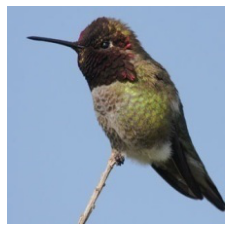

Figures are  (224, 224, 3)


In [20]:
#Load an image and determine image shape for analysis.
IMAGE = load_img("/content/train/ANNAS HUMMINGBIRD/025.jpg")
plt.imshow(IMAGE)
plt.axis("off")
plt.show()

IMAGEDATA = img_to_array(IMAGE)
SHAPE = IMAGEDATA.shape
print('Figures are ', SHAPE)

In [21]:
#This will be used on training, test, and valid data
General_datagen = ImageDataGenerator(rescale=1./255, )

In [22]:
train_data = General_datagen.flow_from_directory(TRAIN_DIR, target_size=(224,224))
print('data groups:', len(train_data)) #Will be used to determine steps_per_epoch in my models.
Train_groups = len(train_data)
validation_data = General_datagen.flow_from_directory(VALIDATION_DIR, target_size=(224,224),)
image_qty = len(validation_data.filenames)
print('data groups:', len(validation_data))
print('validation image qty:',str(image_qty))
Valid_groups = len(validation_data)
test_data = General_datagen.flow_from_directory(TEST_DIR, target_size=(224,224),)
print('data groups:', len(test_data))

Found 36609 images belonging to 260 classes.
data groups: 1145
Found 1300 images belonging to 260 classes.
data groups: 41
validation image qty: 1300
Found 1300 images belonging to 260 classes.
data groups: 41


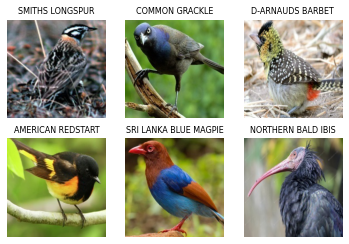

In [23]:
#create seperate labels for images 
def label_images2(DIR, dataset):
    label = []
    image = []
    j=0
    for i in range (0,30):
        j = random.randint(0, len(dataset.filenames))
        label.append(dataset.filenames[j].split('/')[0])
        image.append(DIR + '/' + dataset.filenames[j])
    return [label,image]

#plot the random images.
y,x = label_images2(TEST_DIR, test_data)

for i in range(0,6):
    X = load_img(x[i])
    plt.subplot(2,3,+1 + i)
    plt.axis(False)
    plt.title(y[i], fontsize=8)
    plt.imshow(X)
plt.show()

In [25]:
#This was my Sequential model from the CIFAR10 dataset - seemed like a good starting point. -65% accuracy
#With 2 epochs I got: Test loss: 2.3443613751181243 Test accuracy: 0.4788889
#With 50 epochs/stopped at 13 Test loss: 1.7568193797407479, Test accuracy: 0.5733333..Not so great. I will move on to pretrained models.
#Increased from 32 to 64 nodes in CONV2D layers: Test loss: 4.270853807186258, Test accuracy: 0.5377778
#Changed from Adam to sgd for optimizer:Test loss: 1.4400342908398858, Test accuracy: 0.65444446 - 65%
backend.clear_session()
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same',input_shape=SHAPE)) #224X224
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3))) #222x222
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #111x111
model.add(BatchNormalization())
model.add(Dropout(0.35)) #Doesn't appear to be working in the model summary.

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization()) 

model.add(Conv2D(64, (3, 3))) #109x109
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #54x54
model.add(BatchNormalization())
model.add(Dropout(0.35)) #64 --> 42

model.add(Conv2D(64, (3, 3), padding='same')) #54x54
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Flatten()) 
model.add(Dropout(0.5)) 
model.add(Dense(512)) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(Category_count)) #Updated for number of classes
model.add(Activation('softmax'))

model.summary()

#Compile
model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
#fit model
history = model.fit_generator( 
    train_data, 
    steps_per_epoch = Train_groups, 
    epochs = 3,
    validation_data = validation_data,
    validation_steps = Valid_groups,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience = 5, restore_best_weights = True),
               ReduceLROnPlateau(monitor = 'val_loss', factor = 0.7, #0.2 to 0.5 dropped to fast 0.7
                                 patience = 2, verbose = 1)])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 224, 224, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 111, 111, 64)      2

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1145/1145 [==============================] - 135s 117ms/step - loss: 4.6449 - accuracy: 0.1238 - val_loss: 2.7400 - val_accuracy: 0.3892
Epoch 2/3
1145/1145 [==============================] - 134s 117ms/step - loss: 2.3660 - accuracy: 0.4934 - val_loss: 2.0119 - val_accuracy: 0.5346
Epoch 3/3
1145/1145 [==============================] - 134s 117ms/step - loss: 1.4966 - accuracy: 0.6892 - val_loss: 1.7515 - val_accuracy: 0.6000


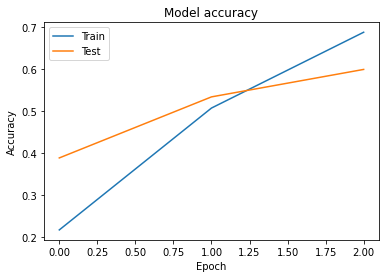

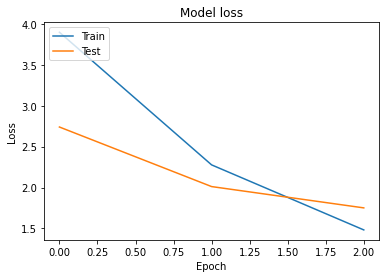

41/41 [==============================] - 3s 64ms/step - loss: 1.6262 - accuracy: 0.6231
Test loss: 1.6261883974075317
Test accuracy: 0.6230769157409668


In [26]:
#plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate against test data.
scores = model.evaluate(test_data, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])